In [ ]:
import os
import tarfile
import urllib
import pandas as pd

### About the dataset: 
    we download the calfornia housing prices dataset from stalib repository. Its based on california's 1990 census. This data includes metrics such as population, median income and median housing price for each district in california. 
    
District is a block (geographical unit with 600 - 3000 people. 
    
    
### Goal: 

We want to predict mediam housing price in any district given all other metrics. 

### Download data 

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

## Data Exploration
Take a peak at the data 

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### comments: 

Notice total_bedrooms has 20433 nonnull values, meaning that 207 districts are missing this feature. 
Ocean_proxmity is showing object type (since it came from csv its probably text type). Using head we can check and see that it seems like a categorial variable. we can use value_counts() method to find how many districts belong to each category. 


#### FINDING CATEGORIES OF CATEGORIAL VARIABLES

In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

std is standard deviation

25%, 50%, 75% rows show the corresponding percentiles. 

e.g 25% of the districts have their median age less than 18
50% lower than 29 and 75% are lower than 37.

## Visualizing the data 

 > The point here is that despite the temptation to summarize dat using “simple” statistics,
unless you have a good sense of the full distribution of your data (best achieved via visualization),
these statistics can be misleading. People often assume “Gaussian-like” properties of data sets 
(more on Gaussian distributions later in the course), and when distributions are decided non-Gaussian,
this can lead to a lot of misleading characterizations.

>  a good rule of thumb in most machine learning algorithm is that if you can't see the pattern you're trying to predict, neither will a machine learning algorithm.

>  see notes for details :http://www.datasciencecourse.org/notes/visualization/ 



array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

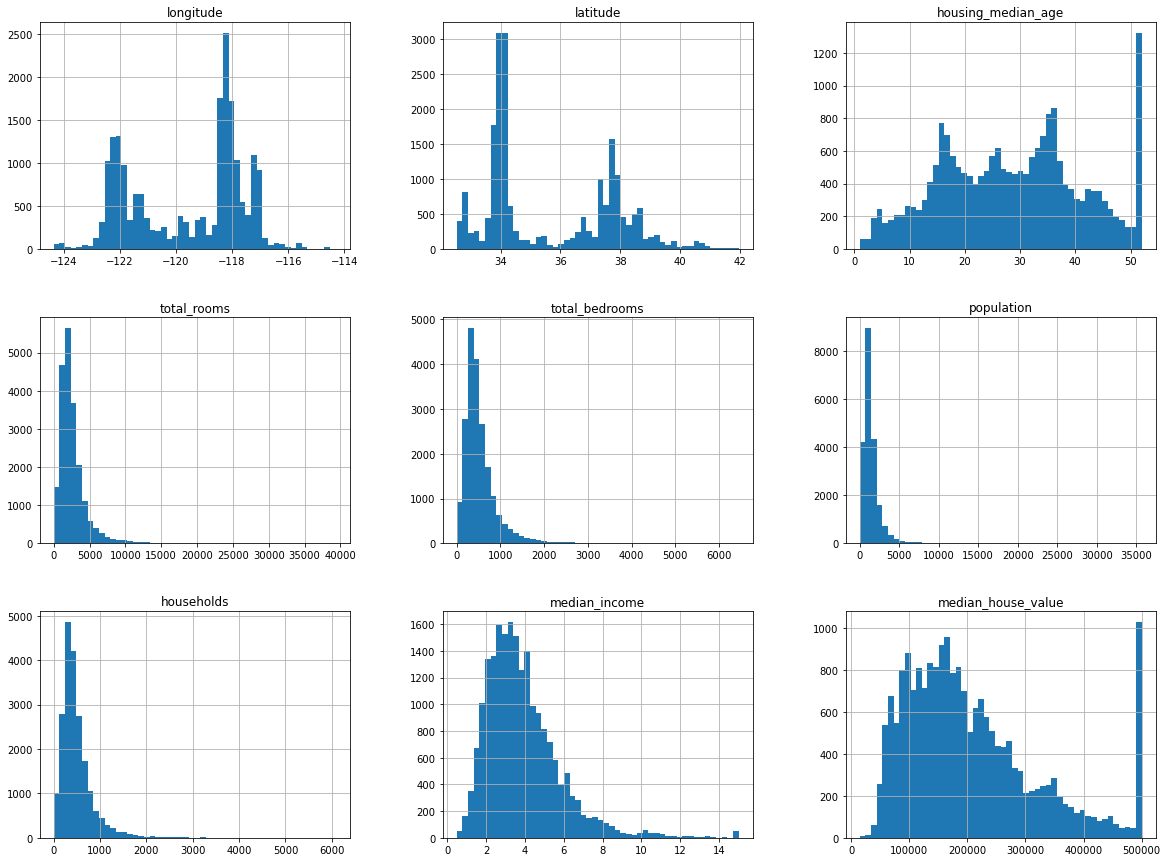

In [ ]:
%matplotlib inline 

import matplotlib.pyplot as plt 

housing.hist(bins = 50, figsize = (20,15))

### Histograms — numerical data

Histograms are the workhorse of exploratory data analysis. They are indispensable for quickly understanding the distribution of values that a particular feature takes on. And because the distances between points on the x axis do indeed make sense for interval or ratio data, it also is not incorrect to create a line plot showing the overall shape of the distribution.


For 1D numerical data (either interval or ratio), the histogram is the natural generalization of a bar chart. 
Histograms show frequency counts as well, but do so by lumping together ranges in the numerical data (the ranges are typically chosen automatically, 
i.e., to linearly span over the entire range of the data set). 
We can construct a histogram using the plt.hist() command as in the following code.





Essentially, what is being done here is that the entire range of the data is divided into bins number of equal-sized 
bins, spanning the entire range of the data. We then count the number of 
points that fall into each bin, and generate a bar chart over this binned data. 
There is some skill to picking the number of bins versus the number of samples in the data, 
but this can be done by simply trying out a few different values and seeing which produces the most understandable figure.





### ScatterPlots 

If both dimensions of the data are numeric, the most natural first type of plot to consider is the scatter plot: plotting points that simply correspond to the different coordinates of the data.The scatter plot gives one of the most complete views of the data, since every data point is plotted in the visualization. It also gives a good visual indication of the “density” of the points. However, there is also a natural failure mode, where there are too many points to clearly separate, and the plot loses its ability to indicate the density of the data. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

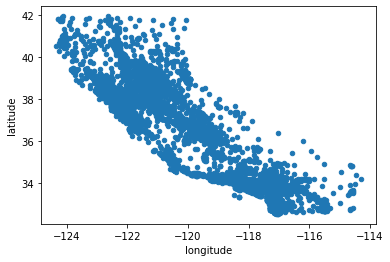

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

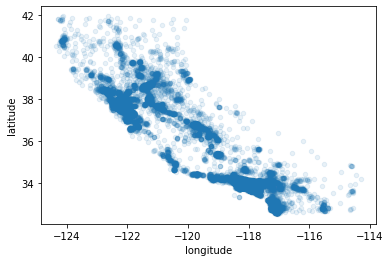

In [ ]:
housing.plot(kind="scatter",x="longitude", y="latitude", alpha =0.1)

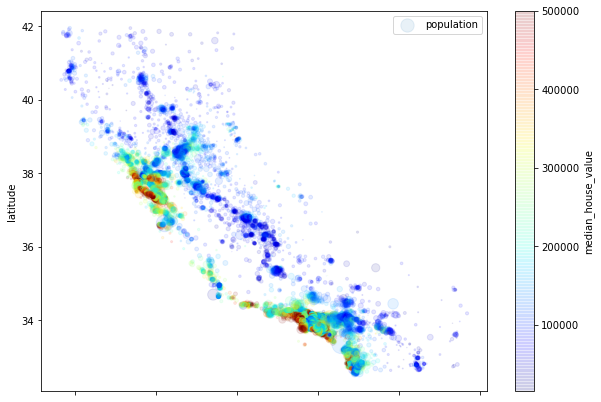

In [ ]:
housing.plot(kind="scatter",x="longitude", y="latitude", alpha =0.1,
             s=housing["population"]/100, label = "population", figsize =(10,7),
             c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()

In [ ]:
Here the color represents the price and radius of each circle is represents district population
we use the default camp called jet 

### Looking for correlations: 

we have two ways of checking for correlations. 

we can compute the standard correlation coefficient between every pain of attributes using the corr() method: 




In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation; e.g median house value goes up when median income goes up. 


In [ ]:
Another way to check for correlation between attributs is to use pandas scatter_matrix() function, which plots every numerical 
attribute against every other numerical attribute. For 11 attributes is 11 * 11 PLOTS. 

Instead of plotting 121 plots, lets focus on few promosing attributes. 



SyntaxError: invalid syntax (<ipython-input-28-d339367a8709>, line 1)

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

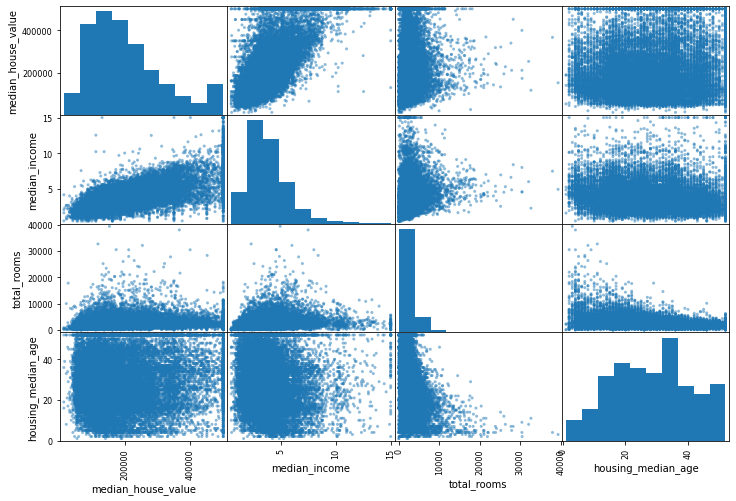

In [ ]:
from pandas.plotting import scatter_matrix 

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize = (12,8))

The most promosing attribute to predict median house value is the median income. so lets zoom in.  

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

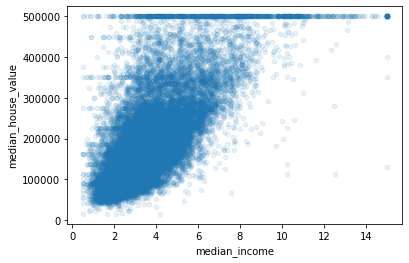

In [ ]:
housing.plot(kind="scatter", x = "median_income", y = "median_house_value", alpha = 0.1)